In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv("Placement_Data_Full_Class.csv")
df.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
#we can see only salary column has 148 non null value, means these many students didn't get placed in campus recruitment.
df.shape

(215, 15)

In [7]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [8]:
#find the percentage from the salary column to see how many people didn't placed in camous recruitment
df_salary = df['salary'].isnull().sum()/(len(df))*100
print("null values of salary column", round(df_salary,2))

null values of salary column 31.16


In [9]:
#let us see object coloumn in the data
df.select_dtypes(include = ['object']).head(5)

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed


In [10]:
#getting object columns details in df
obj_col = df.select_dtypes(include=['object']).columns
for i in obj_col:
    display(df[i].value_counts())

M    139
F     76
Name: gender, dtype: int64

Central    116
Others      99
Name: ssc_b, dtype: int64

Others     131
Central     84
Name: hsc_b, dtype: int64

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

No     141
Yes     74
Name: workex, dtype: int64

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

Placed        148
Not Placed     67
Name: status, dtype: int64

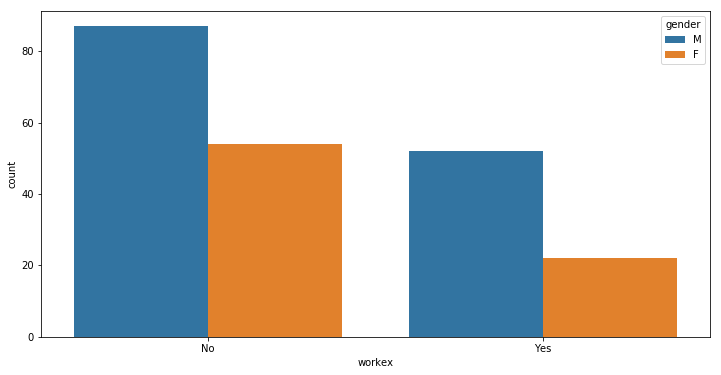

In [11]:
#countplots
#male students have more experience than female
plt.figure(figsize=(12,6))
sns.countplot('workex', data = df, hue = 'gender')
plt.show()

In [12]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

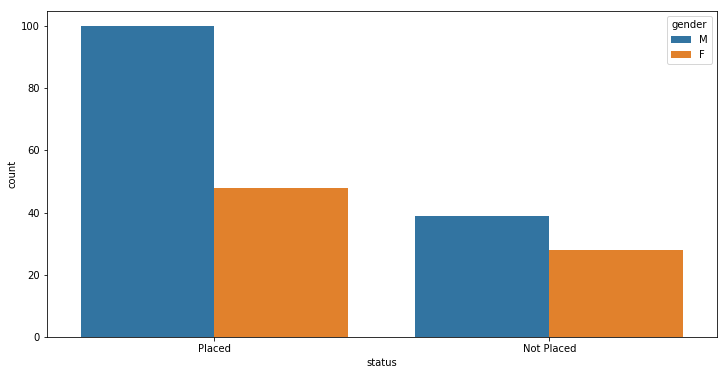

In [13]:
#we can see more male sudents than female students
plt.figure(figsize=(12,6))
sns.countplot('status', data = df, hue = 'gender')
plt.show()

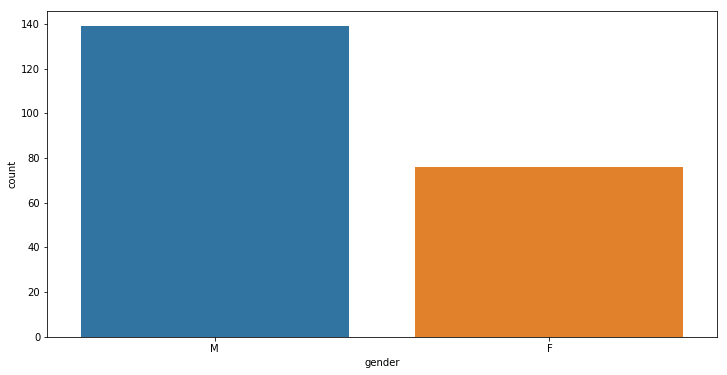

In [14]:
# we have around 140 male students and around 70 female students
plt.figure(figsize=(12,6))
sns.countplot('gender', data = df)
plt.show()

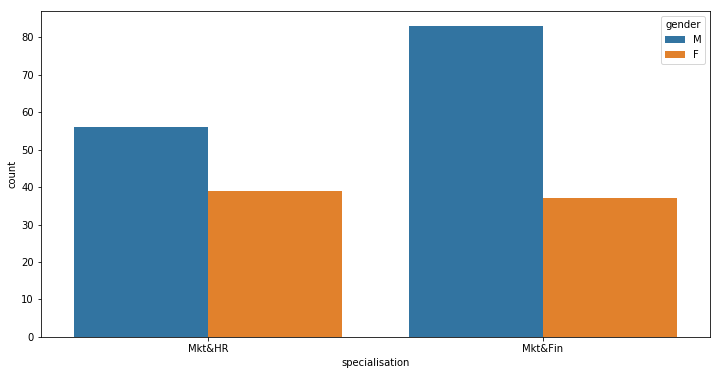

In [15]:
#many male students have specialisation in mkt&fin than mkt&hr, female have equal specailisation in both field
plt.figure(figsize=(12,6))
sns.countplot('specialisation', data = df, hue = 'gender')
plt.show()

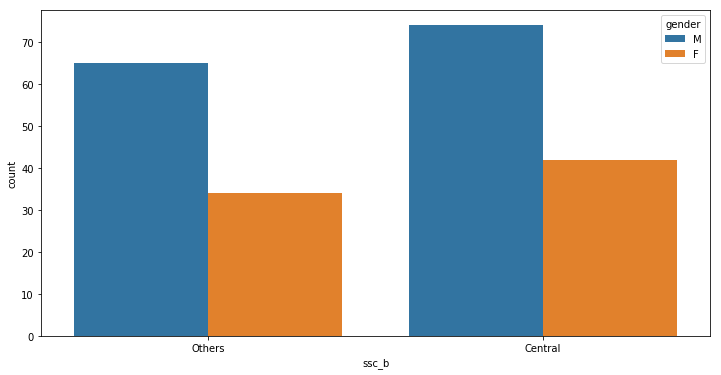

In [16]:
#secondry board of education, central board has more students than others
plt.figure(figsize=(12,6))
sns.countplot('ssc_b', data = df, hue = 'gender')
plt.show()

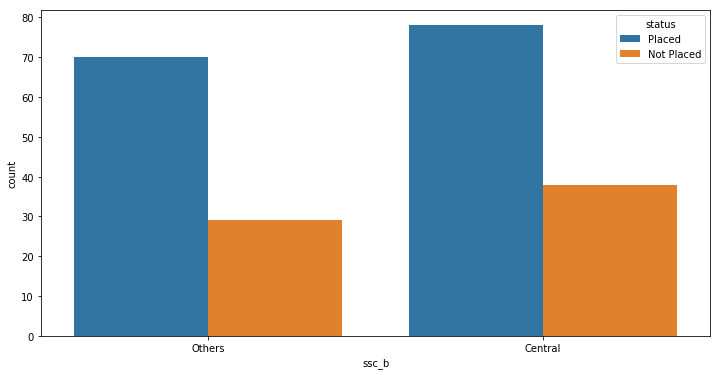

In [17]:
plt.figure(figsize=(12,6))
sns.countplot('ssc_b', data = df, hue = 'status')
plt.show()

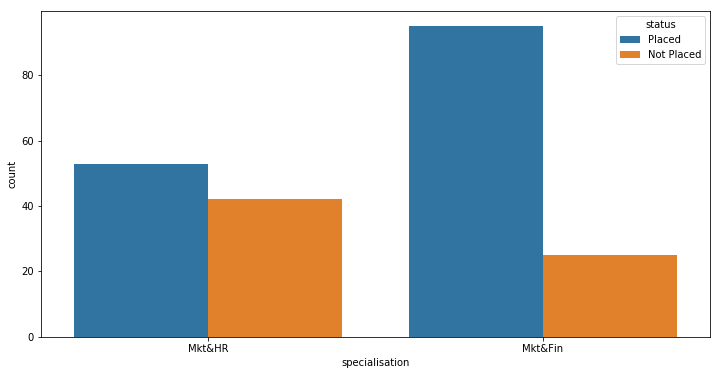

In [18]:
plt.figure(figsize=(12,6))
sns.countplot('specialisation', data = df, hue = 'status')
plt.show()

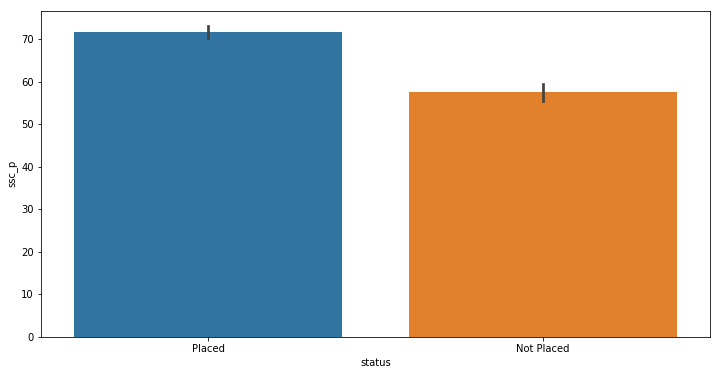

In [19]:
#secondary education 10th grade(ssc_p)
plt.figure(figsize=(12,6))
sns.barplot(x = 'status', y = 'ssc_p', data = df )
plt.show()

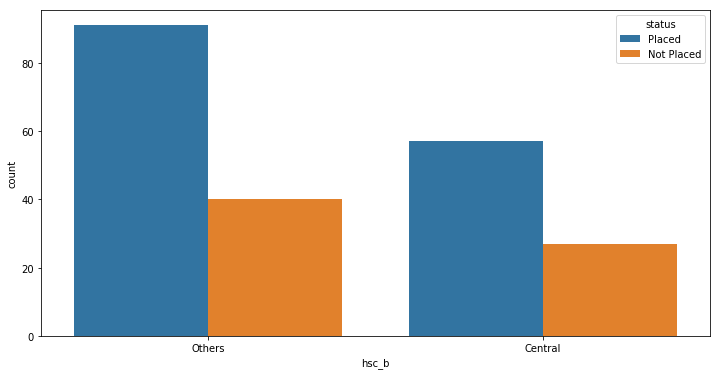

In [20]:
#higher board of education(hsc_b)
plt.figure(figsize=(12,6))
sns.countplot('hsc_b', data = df, hue = 'status')
plt.show()

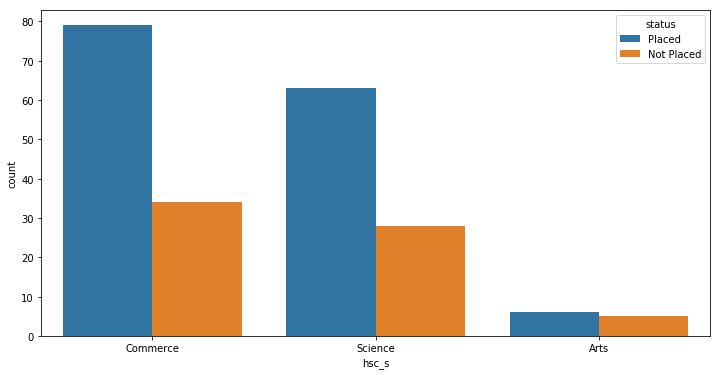

In [21]:
plt.figure(figsize=(12,6))
sns.countplot('hsc_s', data = df, hue = 'status')
plt.show()

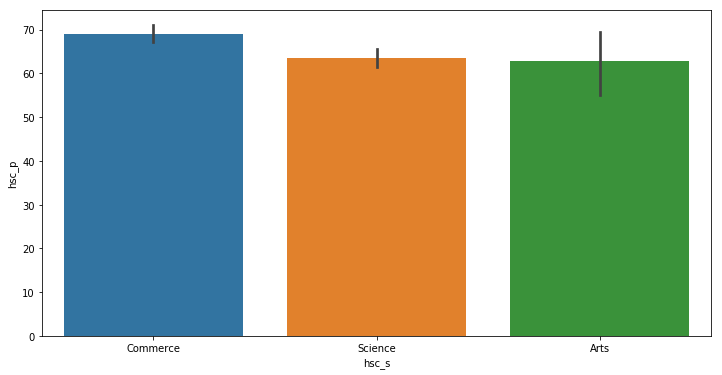

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'hsc_s', y = 'hsc_p', data = df)
plt.show()

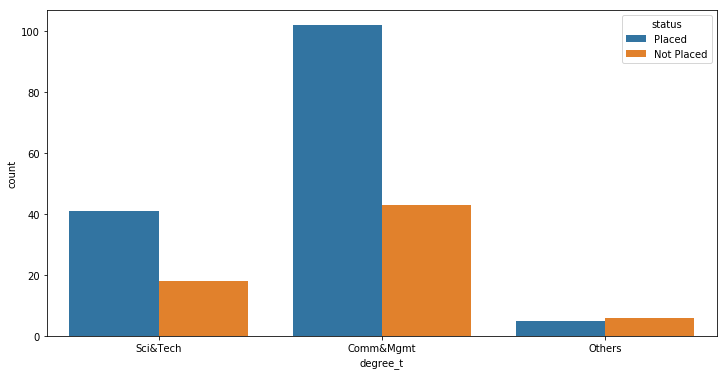

In [23]:
plt.figure(figsize=(12,6))
sns.countplot('degree_t', data = df, hue = 'status')
              
plt.show()

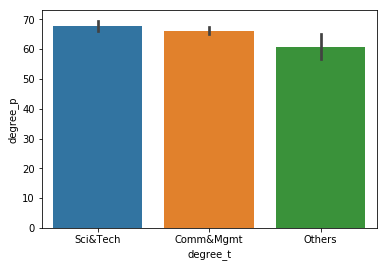

In [24]:
#degree type and degree percentage(degree_t, degree_p)
sns.barplot(x = 'degree_t', y = 'degree_p', data = df)
plt.show()

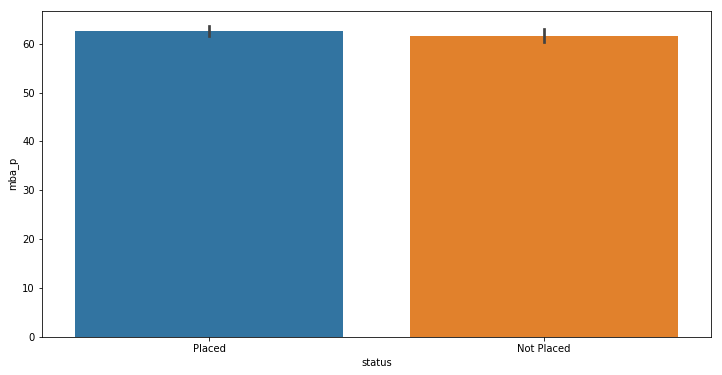

In [25]:
plt.figure(figsize=(12,6))
sns.barplot( x = 'status', y = 'mba_p', data = df)
plt.show()

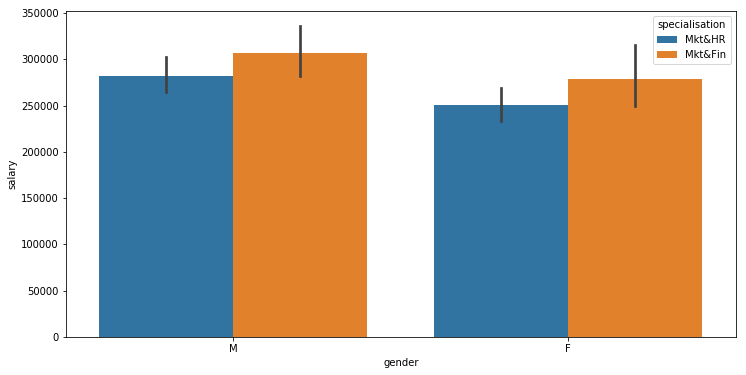

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'gender', y = 'salary', data = df, hue = 'specialisation')
plt.show()

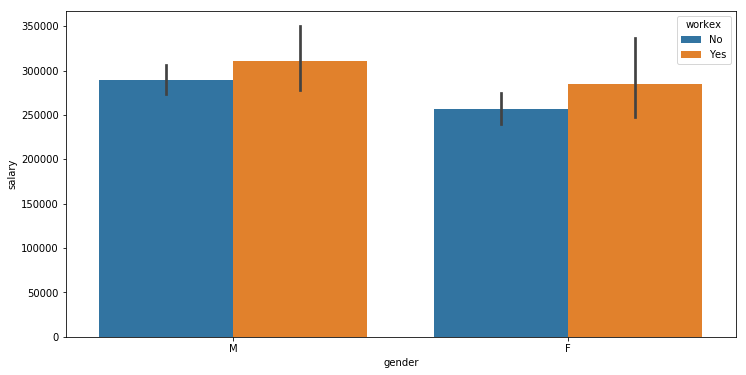

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'gender', y = 'salary', data = df, hue = 'workex')
plt.show()

# Preprocessing
only salary column has 67 null values, salary column is not important to analize the data, we can drop salary column and sl.no column, second secondry and higher secondary board columns are also not important to build our model, however we can drop these cols as well. we need some encoding of our data object columns.

In [28]:
df['gender'] = df['gender'].map({'M':0, 'F': 1})
df['status'] = df['status'].map({'Placed': 1, 'Not Placed': 0})
df['workex'] = df.workex.map({'No': 0, 'Yes': 1})
df['specialisation'] = df['specialisation'].map({'Mkt&HR': 1, 'Mkt&Fin': 0})

In [29]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [30]:
df.dtypes

sl_no               int64
gender              int64
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex              int64
etest_p           float64
specialisation      int64
mba_p             float64
status              int64
salary            float64
dtype: object

In [31]:
df.drop(['sl_no', 'salary','ssc_b', 'hsc_b'], axis = 1, inplace = True)

In [32]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1
1,0,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1
3,0,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1


In [33]:
#getting dummies of 2 object class: hsc_s, degree_t
for col in ['hsc_s', 'degree_t']:
    dummies = pd.get_dummies(df[col])
    df[dummies.columns] = dummies


In [34]:
#now we can drop these cols
df.drop(['hsc_s', 'degree_t'], axis = 1, inplace = True)

In [35]:
df.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,0,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,0,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,0,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,0,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,0,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


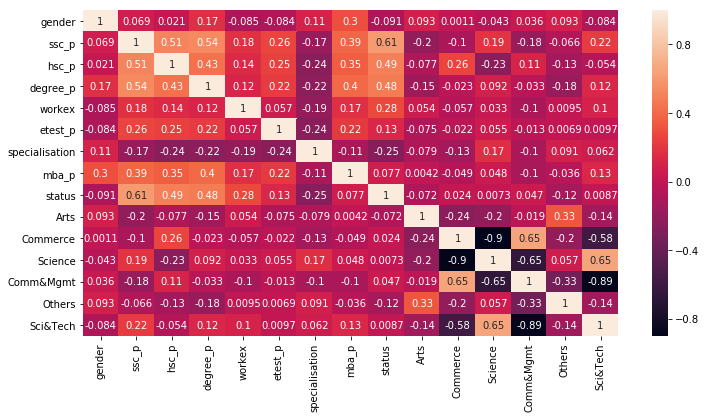

In [36]:
# correleation matrix help you to find less correlated variables.
cor_met = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor_met, annot = True)

In [37]:
#dropping less correlated variables
df.drop(['Arts', 'Others'], axis = 1, inplace = True)

In [38]:

y = df['status']


In [39]:
df.drop('status', axis = 1, inplace = True)

In [40]:
x = df

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.3, shuffle = True)

In [42]:
x_test.shape

(65, 12)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
y_pred = logistic.predict(x_test)
log_score = accuracy_score(y_test, y_pred)
#creating confusion matrix
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
print(confusion_mat)
log_score


    0   1
0  12   7
1   3  43


C:\Users\neetu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8461538461538461

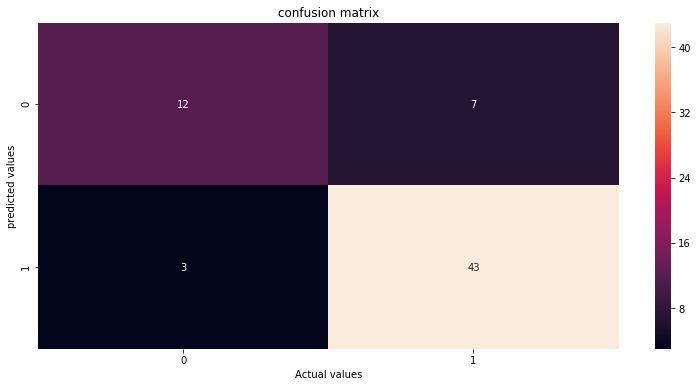

In [45]:
#creating heatmap with confusion matrix
plt.figure(figsize=(13,6))
sns.heatmap(confusion_mat, annot = True, linecolor = 'white')
plt.xlabel("Actual values")
plt.ylabel("predicted values")
plt.title("confusion matrix")
plt.show()

In [46]:


print(f"classification report:\n " , classification_report(y_test, y_pred))

classification report:
                precision    recall  f1-score   support

           0       0.80      0.63      0.71        19
           1       0.86      0.93      0.90        46

    accuracy                           0.85        65
   macro avg       0.83      0.78      0.80        65
weighted avg       0.84      0.85      0.84        65



In [47]:
# our classifiaction report looks good.
print("accuracy score of LogisticRegression model:\n", accuracy_score(y_test,y_pred)*100)

accuracy score of LogisticRegression model:
 84.61538461538461


In [48]:
#we can see our accuracy is 84% without tuning means our preprocessing was good.
#ploting roc curve
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [49]:
#false positive rate(fpr), True positive rate(tpr), with various threshold
log_roc = roc_auc_score(y_test, y_pred)
fpr,tpr, thresholds = roc_curve(y_test, logistic.predict_proba(x_test)[:,1])

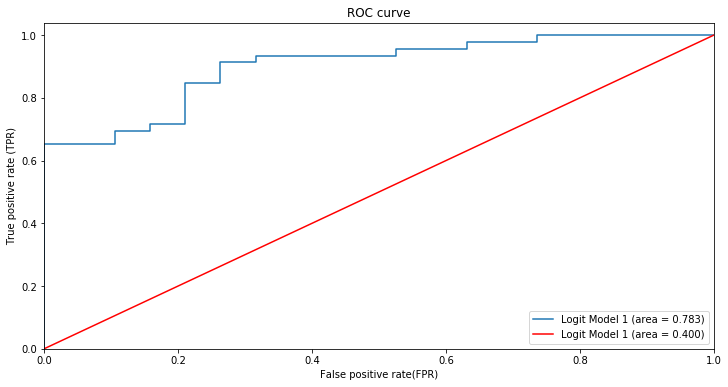

In [50]:
plt.figure(figsize = (12,6))
plt.plot(fpr, tpr, label = "Logit Model 1 (area = {0:0.3f})".format(log_roc))
plt.plot([0,1],[0,1], color = 'red', label = "Logit Model 1 (area = 0.400)")
plt.xlim(0, 1)
plt.ylim(0, 1.04)
plt.title("ROC curve")
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate (TPR)")
plt.legend(loc = "lower right")
         

plt.show()


In [51]:
#calculating auc
auc_score = auc(fpr,tpr)
print("area under the curve: ", round(auc_score,4))
                                                  

area under the curve:  0.8993


In [52]:
# Decesion tree classifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
dt_score = accuracy_score(y_test, y_pred)
dt_score

0.7384615384615385

Text(0.5,1,'confusion matrix')

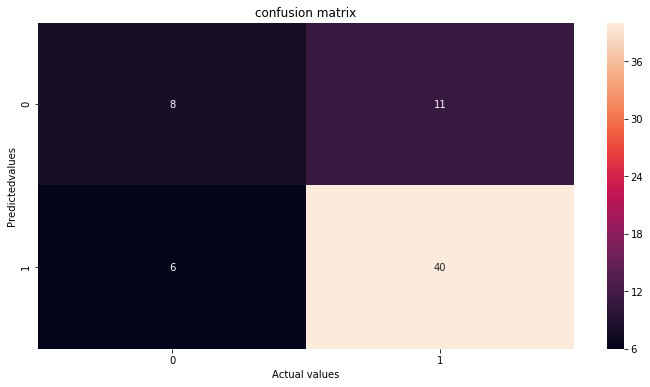

In [53]:
dt_confusion = pd.DataFrame(confusion_matrix(y_test, y_pred))
plt.figure(figsize = (12,6))
sns.heatmap(dt_confusion, annot = True)
plt.xlabel("Actual values")
plt.ylabel("Predictedvalues")
plt.title("confusion matrix")

In [54]:
print("classification report\n", classification_report(y_test, y_pred))

classification report
               precision    recall  f1-score   support

           0       0.57      0.42      0.48        19
           1       0.78      0.87      0.82        46

    accuracy                           0.74        65
   macro avg       0.68      0.65      0.65        65
weighted avg       0.72      0.74      0.73        65



In [55]:
print("accuracy score of Decesion tree classifier", accuracy_score(y_test, y_pred))

accuracy score of Decesion tree classifier 0.7384615384615385


In [56]:
#We can see our decesiontree classifier is not as good as logistic regression.
log_roc = roc_auc_score(y_test, y_pred)
fpr,tpr, thresholds = roc_curve(y_test, dt.predict_proba(x_test)[:,1])


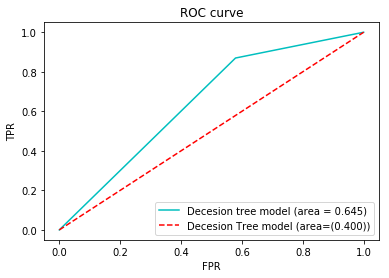

In [57]:
plt.plot(fpr, tpr, label = "Decesion tree model (area = {0:0.3f})".format(log_roc), color = "c")
plt.plot([0,1],[0,1], color = 'r', label = "Decesion Tree model (area=(0.400))", linestyle = "--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.legend()
plt.show()


In [58]:
auc_score = auc(fpr,tpr)
print("area under the curve ", round(auc_score,3))

area under the curve  0.645


In [59]:
#using cross_val_score to see wich model is good.
from sklearn.model_selection import cross_val_score
cl_log = cross_val_score(LogisticRegression(), x, y)
cl_log

C:\Users\neetu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\neetu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

array([0.8372093 , 0.79069767, 0.90697674, 0.86046512, 0.88372093])

In [60]:


np.mean(cl_log)

0.855813953488372

In [61]:
from sklearn.ensemble import RandomForestClassifier
cl_rm = cross_val_score(RandomForestClassifier(n_estimators = 40), x, y)
cl_rm

array([0.93023256, 0.81395349, 0.88372093, 0.8372093 , 0.76744186])

In [62]:
import math
np.mean(cl_rm)

0.8465116279069769

In [63]:
from sklearn.svm import SVC
cl_svc = cross_val_score(SVC(), x, y)
cl_svc

array([0.86046512, 0.81395349, 0.88372093, 0.79069767, 0.81395349])

In [64]:
np.mean(cl_svc)

0.8325581395348838

In [65]:
from sklearn.tree import DecisionTreeClassifier
cl_dt = cross_val_score(DecisionTreeClassifier(), x, y)
cl_dt

array([0.74418605, 0.79069767, 0.8372093 , 0.76744186, 0.74418605])

In [66]:
np.mean(cl_dt)

0.7767441860465116

 RandomForest and logisticRegression models have almost same cross_val_score

In [67]:
rm = RandomForestClassifier(n_estimators = 40, criterion = 'gini', max_depth = 10)
rm.fit(x_train, y_train)
rm_pred = dt.predict(x_test)
rm_score = accuracy_score(y_test, rm_pred)
rm_score

0.7384615384615385

In [68]:
sv = SVC(probability = False, kernel = 'rbf', degree = 3, cache_size=200)
sv.fit(x_train, y_train)
sv_pred = sv.predict(x_test)
sv_score = accuracy_score(y_test, sv_pred)
sv_score

0.7846153846153846

In [69]:
print("accuracy score of DecisionTree, RandomForest, Support Vector and LogisticRegression", dt_score, rm_score, sv_score, log_score)

accuracy score of DecisionTree, RandomForest, Support Vector and LogisticRegression 0.7384615384615385 0.7384615384615385 0.7846153846153846 0.8461538461538461


# Logistic Regression has a better accuracy score then other models

In [70]:
#above we use SVC, here we are using svc with svm classifier.
from sklearn import svm
clf = svm.SVC(kernel = 'linear', C=1)
scores = cross_val_score(clf, x, y, cv = 10)
scores

array([0.81818182, 0.90909091, 0.81818182, 0.90909091, 0.95454545,
       0.9047619 , 0.9047619 , 0.85714286, 0.85714286, 0.9047619 ])

In [71]:
print(scores.mean())

0.8837662337662338


In [72]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits = 10, test_size = 0.3)
score = cross_val_score(clf, x, y, cv = cv)
score

array([0.86153846, 0.87692308, 0.87692308, 0.90769231, 0.90769231,
       0.8       , 0.86153846, 0.86153846, 0.87692308, 0.89230769])

In [73]:
print(score.mean())

0.8723076923076925


In [74]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf2 = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
score2 = cross_val_score(clf2, x, y, cv = cv)
score2

array([0.90769231, 0.83076923, 0.86153846, 0.93846154, 0.86153846,
       0.89230769, 0.86153846, 0.86153846, 0.96923077, 0.90769231])

In [75]:
print(round(score2.mean(), 3))

0.889


# Using Cross_validate first using two metrics

In [76]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn import svm
scoring = ['precision_macro', 'recall_macro']
clf_validate = svm.SVC(kernel = 'linear', C=1, random_state =0)
score_validate = cross_validate(clf_validate, x, y, scoring = scoring)
sorted(score_validate.keys())


['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [77]:
score_validate['test_recall_macro']

array([0.85128205, 0.71923077, 0.94487179, 0.78694581, 0.8953202 ])

In [78]:
score_validate['test_recall_macro'].mean()

0.8395301250473665

In [79]:
score_validate['test_precision_macro'].mean()

0.8532660709783574

# Using single metrics

In [80]:
single_validate = cross_validate(clf_validate, x,y, scoring = 'precision_macro', cv = 5, return_estimator=True )
sorted(single_validate.keys())

['estimator', 'fit_time', 'score_time', 'test_score']

In [82]:
single_validate()

TypeError: 'dict' object is not callable